In [2]:
!pip install pandas
import pandas as pd
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

# READ CSV, CLEAN COLUMNS & SET INDEXES

In [3]:
def read_path(path='df_audio_features_5000'):
    df = pd.read_csv(path)
   
    df.columns = [x.strip( ) for x in df.columns]
    df = df.set_index(['name', 'artist'])
   
    return df


df = read_path()



In [4]:
df.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,artist,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


# FEATURE SELECTION

In [7]:
def get_features(df):
   
    df_featured = df.drop(columns=['type',
                                   'key',
                                   'mode', 
                                   'speechiness', 
                                   'tempo',
                                   'duration_ms',
                                   'time_signature',
                                   'id',
                                   'html'])
    return df_featured


df_featured = get_features(df)

df_featured.head()


,,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,-13.141,0.694,0.000059,0.975,0.306
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,-12.646,0.217,0.000002,0.107,0.693
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,-11.048,0.453,0.000063,0.124,0.905
Mulher Eu Sei,Chico César,0.705,0.0502,-18.115,0.879,0.000041,0.386,0.524
Rosa Morena,Kurt Elling,0.651,0.1190,-19.807,0.916,0.000343,0.104,0.402


<AxesSubplot:>

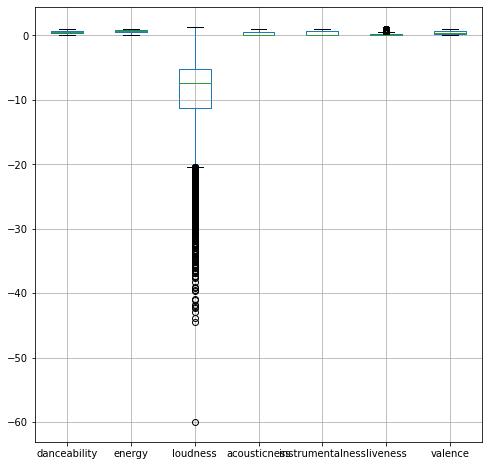

In [8]:
df_featured.boxplot(figsize=(8,8))

# TRANSFORMING WITH RobustScaler

In [9]:
def transformer(df):
    my_robust = RobustScaler()

    my_robust.fit(df_featured) 

    scaled_features = my_robust.transform(df_featured) 

    scaled_features=pd.DataFrame(scaled_features,
             index=df.index,
             columns=df_featured.columns)
    
    return scaled_features

scaled_features = transformer(df)


#display(scaled_features)


<AxesSubplot:>

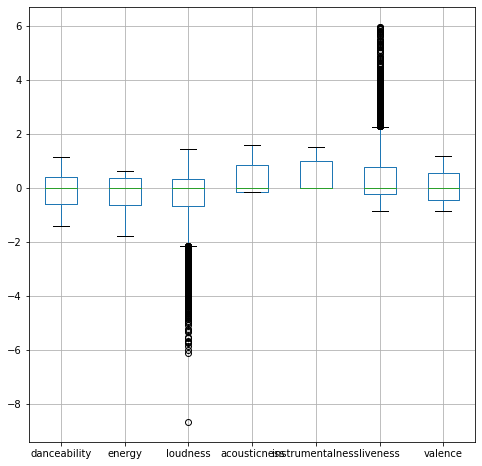

In [7]:
scaled_features.boxplot(figsize=(8,8))

# TRANSFORMING WITH MinMaxScaler

In [10]:
def minimax(df):
    my_minmax = MinMaxScaler()

    my_minmax.fit(scaled_features)

    scaled_features_2 = my_minmax.transform(scaled_features)

    scaled_features_2=pd.DataFrame(scaled_features_2,
                 index=df_featured.index,
                 columns=df_featured.columns)
    return scaled_features_2

scaled_features_2 = minimax(df)

scaled_features_2.head()

,,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,0.763897,0.696787,0.000060,0.987842,0.310660
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.771967,0.217871,0.000002,0.108409,0.703553
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.7300,0.798018,0.454819,0.000064,0.125633,0.918782
Mulher Eu Sei,Chico César,0.729059,0.0502,0.682811,0.882530,0.000041,0.391084,0.531980
Rosa Morena,Kurt Elling,0.673216,0.1190,0.655228,0.919679,0.000348,0.105370,0.408122


<AxesSubplot:>

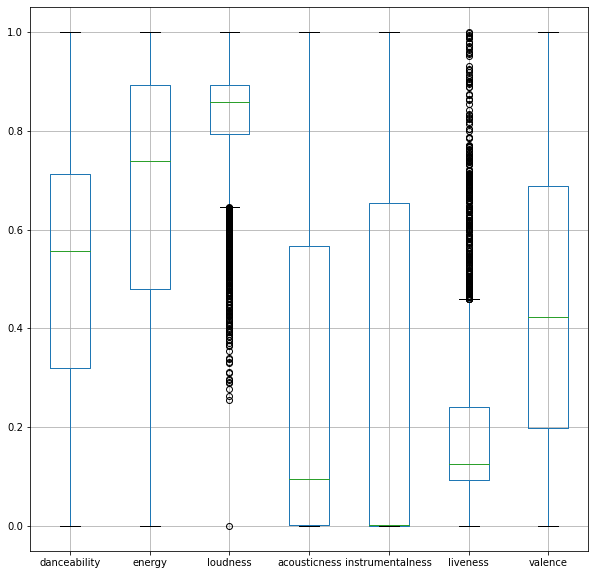

In [11]:
scaled_features_2.boxplot(figsize=(10, 10))

# FINDING THE RIGHT N° OF CLUSTERS WITH INERTIA METHOD

In [12]:
scaled_features_in = scaled_features

In [13]:
inertia_list = []

def inertia_method(df):
    for i in range(2,30):
        myKMeans = KMeans(n_clusters=i)
        myKMeans.fit(scaled_features_in)
        inertia_list.append(round(myKMeans.inertia_))
    return scaled_features_in  

scaled_features_in = inertia_method(df)

C:\Users\leoos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leoos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leoos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leoos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leoos\anaconda3\lib\site-packages\sklearn\clust

In [31]:
#display(inertia_list)

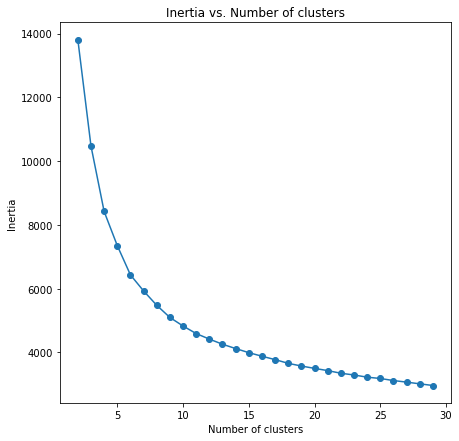

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.plot(range(2, 30), inertia_list, '-o')

plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of clusters')

plt.show()

#  FINDING THE RIGHT N° OF CLUSTERS WITH SILHOUETTE METHOD

In [15]:
scaled_features_sil = scaled_features

In [16]:
sil_list = []

def silh_method(df):

    for i in range(2, 30):
        myKMeans = KMeans(n_clusters=i)
        myKMeans.fit(scaled_features_sil)
        sil_score = silhouette_score(scaled_features_sil, myKMeans.labels_)
        sil_list.append(sil_score)
    return scaled_features_sil  
scaled_features_sil = silh_method(df)    

C:\Users\leoos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leoos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leoos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leoos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leoos\anaconda3\lib\site-packages\sklearn\clust

In [17]:
#display(scaled_features_sil)

In [18]:
#sil_list

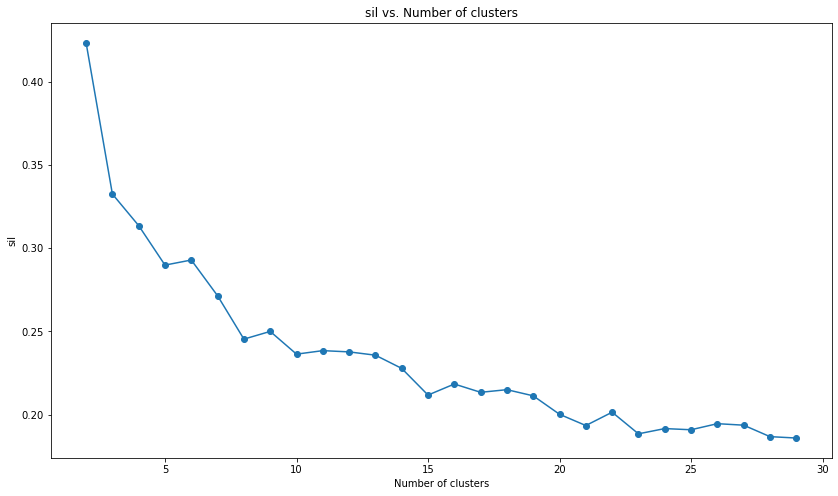

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(range(2, 30), sil_list, '-o')

plt.xlabel('Number of clusters')
plt.ylabel('sil')
plt.title('sil vs. Number of clusters')

plt.show()

In [20]:
def clustering(df, n_clusters= 6):
    audio_kmeans = KMeans(n_clusters= 6)
    audio_kmeans.fit(scaled_features)
    clustered_audio = audio_kmeans.predict(scaled_features)
    return clustered_audio

clustered_audio = clustering(df, n_clusters= 6)

df["cluster"] = clustered_audio

df.head()

C:\Users\leoos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster
name,artist,,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,5
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,1
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,4
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...,1
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...,1


In [27]:
df.groupby('cluster').apply(lambda x: x.sample(3))

danceability  \
cluster name                                               artist                                                           
0       Steh' auf, wenn du auf Zwerge stehst - Otto Mix... 7 Zwerge                                                 0.846   
        Del Montón                                     ... Sr. Chinarro                                             0.849   
        I Love It (feat. Charli XCX)                   ... Icona Pop                                                0.711   
1       Tannhäuser, WWV 70 / Act 3: "Allmächt'ge Jungfr... Richard Wagner                                           0.163   
        3 Gymnopédies: No. 1, Lent et douloureux       ... Erik Satie                                               0.468   
        Piano Sonata No. 13 in A Major, D. 664: II. And... Franz Schubert                                           0.369   
2       Rompe - Live                                   ... Daddy Yankee                                             0.653   
        Baby Love                                      ... The Supremes                                             0.595   
        Get Low                                        ... Dillon Francis                                           0.674   
3       TiK ToK                                        ... Kesha                                                    0.755   
        Richtig Scheisse (auf 'ne schöne Art und Weise)... Killerpilze                                              0.615   
        Das Schäferlied - Radio Version                ... Schäfer Heinrich                                         0.852   
4       I Swear                                        ... All-4-One                                                0.532   
        Fighting Against Conviction                    ... Bunny Wailer                                             0.724   
        A Minha Menina                                 ... Os Mutantes                                              0.606   
5       Constant Reminders                             ... Master                                                   0.163   
        Unquestionable Presence                        ... Atheist                                                  0.221   
        Kadonneet jumalat                              ... Rippikoulu                                               0.230   

                                                                                                              energy  \
cluster name                                               artist                                                      
0       Steh' auf, wenn du auf Zwerge stehst - Otto Mix... 7 Zwerge                                          0.91000   
        Del Montón                                     ... Sr. Chinarro                                      0.61300   
        I Love It (feat. Charli XCX)                   ... Icona Pop                                         0.90600   
1       Tannhäuser, WWV 70 / Act 3: "Allmächt'ge Jungfr... Richard Wagner                                    0.08020   
        3 Gymnopédies: No. 1, Lent et douloureux       ... Erik Satie                                        0.00183   
        Piano Sonata No. 13 in A Major, D. 664: II. And... Franz Schubert                                    0.00245   
2       Rompe - Live                                   ... Daddy Yankee                                      0.75800   
        Baby Love                                      ... The Supremes                                      0.64300   
        Get Low                                        ... Dillon Francis                                    0.93200   
3       TiK ToK                                        ... Kesha                                             0.83700   
        Richtig Scheisse (auf 'ne schöne Art und Weise)... Killerpilze                                       0.95100   
        Das Schäferlied - Radio Version         